![rmotr](https://user-images.githubusercontent.com/7065401/39119486-4718e386-46ec-11e8-9fc3-5250a49ef570.png)
<hr style="margin-bottom: 40px;">

<img src="https://archive.ics.uci.edu/ml/assets/MLimages/Large2.jpg"
    style="width:200px; float: right; margin: 0 40px 40px 40px;"></img>

# Project assignment: US Census Analysis

<i>
> Dataset source: https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data <br>
> Dataset description: https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names
</i>

We will be working with an extraction of data done by Barry Becker from the 1994 Census database.

**[Dataset information and columns](Dataset Info.ipynb)**

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
sns.set(rc={'figure.figsize': (18, 6)})

### Load the Dataset
Located at `data/census-data.csv`. Check it - **no header**!

In [111]:
df = pd.read_csv('data/census-data.csv', sep=', ', engine='python', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [112]:
# Rename the columns using col_names
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
             'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
             'hours-per-week', 'native-country', 'income']

In [113]:
## Hmm, a simpler way:
df.columns = col_names

In [114]:
# df.rename(index=str, columns=dict(enumerate(col_names)), inplace=True)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


It worked!

### Clean the Data
Look for invalid data

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [116]:
# check for null values
# although from above we see that there probably aren't any
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [117]:
# check nan 
# note: count counts all non-nan
len(df) - df.count()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [118]:
for column in df.select_dtypes(exclude="number").columns:
    print(column)
    print(df[column].value_counts(), '\n')

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64 

education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64 

marital-status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital-status, dtype: int64 

occupation
Prof-specialty       4140
Craft-repair         409

Remove the rows **in `workclass` and `native-country`** that contain an invalid entry. The result should have 30169 non-null rows. !Leave the `occupation` column as is - it's okay to not have an occupation.

In [119]:
df.replace('?', np.nan, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         30725 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        30718 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    31978 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [120]:
df.dropna(axis=0, how='any', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 15 columns):
age               30162 non-null int64
workclass         30162 non-null object
fnlwgt            30162 non-null int64
education         30162 non-null object
education-num     30162 non-null int64
marital-status    30162 non-null object
occupation        30162 non-null object
relationship      30162 non-null object
race              30162 non-null object
sex               30162 non-null object
capital-gain      30162 non-null int64
capital-loss      30162 non-null int64
hours-per-week    30162 non-null int64
native-country    30162 non-null object
income            30162 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### Exercise: Convert `income` to an ordered categorical type

In [121]:
df['income'].value_counts()

<=50K    22654
>50K      7508
Name: income, dtype: int64

Turn them into an ORDERED categorical type with the following order: `['<=50K', '>50K']`

In [122]:
categories=list(df['income'].unique())
categories

['<=50K', '>50K']

In [123]:
df['income'] = df['income'].astype('category', categories=categories, ordered=True)
df['income'].dtype

CategoricalDtype(categories=['<=50K', '>50K'], ordered=True)

### Exercise: Create a dummy variable ">50K" or "<=50K" and concatenate them to our dataframe.

In [124]:
dummy = pd.get_dummies(df['income'], columns=['>50K', '<=50K'])
dummy[:10]

,<=50K,>50K
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
5,1,0
6,1,0
7,0,1
8,0,1
9,0,1


In [125]:
df = pd.concat([df, dummy], axis=1)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,<=50K,>50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,1,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,1,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,1,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,1,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,1,0


### Exercise: Plot a distplot showing the `age` distribution

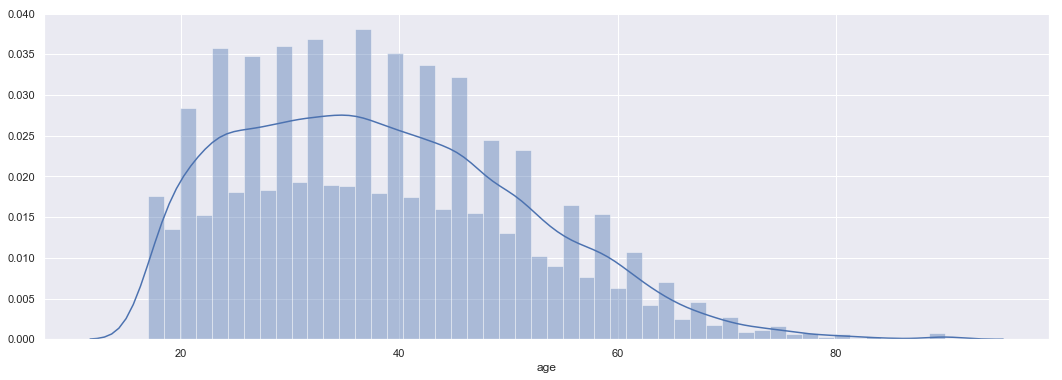

In [126]:
sns.distplot(df['age'])

### Exercise: Plot a boxplot showing the `age` distribution

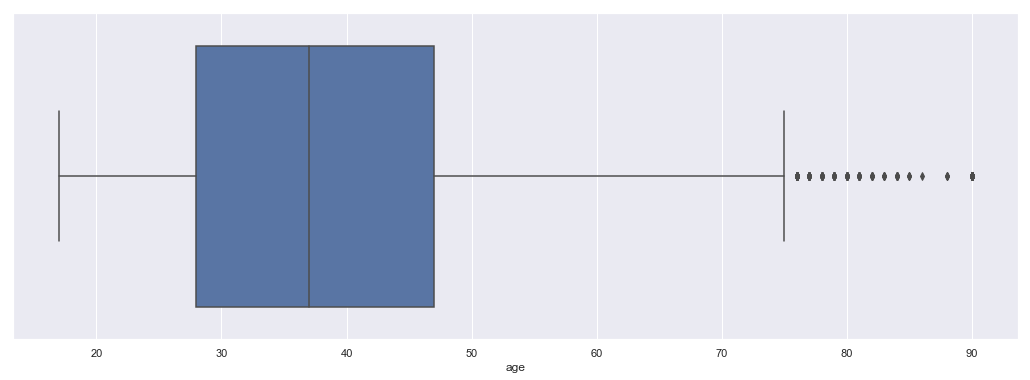

In [127]:
sns.boxplot(df['age'])

### Exercise: Remove outlier values from `age` and plot the previous boxplot again
Suppose values higher than 70 as outliers.

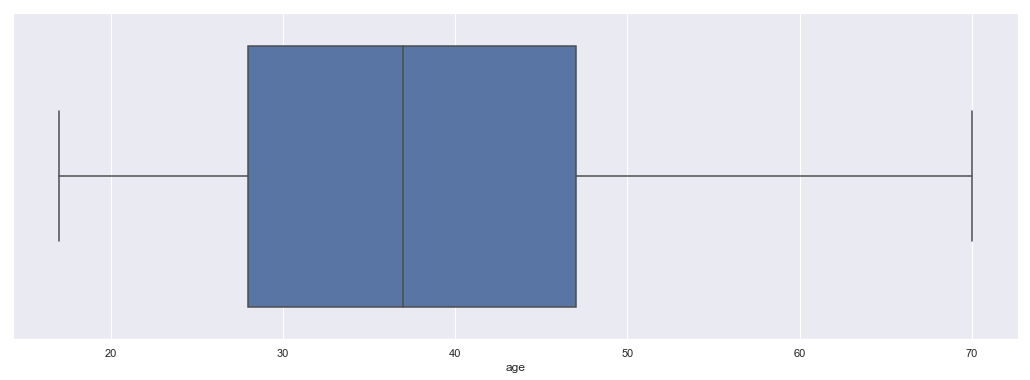

In [128]:
age = df['age'] <= 70

sns.boxplot(df['age'][age])

### Exercise: How many people work more than 20 hours per week?

In [129]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,<=50K,>50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,1,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,1,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,1,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,1,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,1,0


In [130]:
df.loc[df['hours-per-week']>20, 'hours-per-week'].count()

27774

#### I don't know how the Solutions get to the 29633 output. This is the exact same formula (copied after several of my attempts achieve 27774), and it STILL gets 27774! Argh!

### Exercise: How many men and women are there? Show totals and proportions over all the data.

In [131]:
len(df)

30162

In [132]:
n_males = df['sex'][df['sex'] == 'Male'].count()
n_males

20380

In [133]:
n_females = df['sex'][df['sex'] == 'Female'].count()
n_females

9782

In [134]:
n_females + n_males

30162

In [135]:
print('Male count: {}\n\
Female count: {}\n\
Male proportion: {}\n\
Female proportion: {}'.format(n_males, n_females, n_males/len(df), n_females/len(df)))

Male count: 20380
Female count: 9782
Male proportion: 0.6756846362973278
Female proportion: 0.3243153637026722


### Exercise: Plot a bar plot showing the income by gender

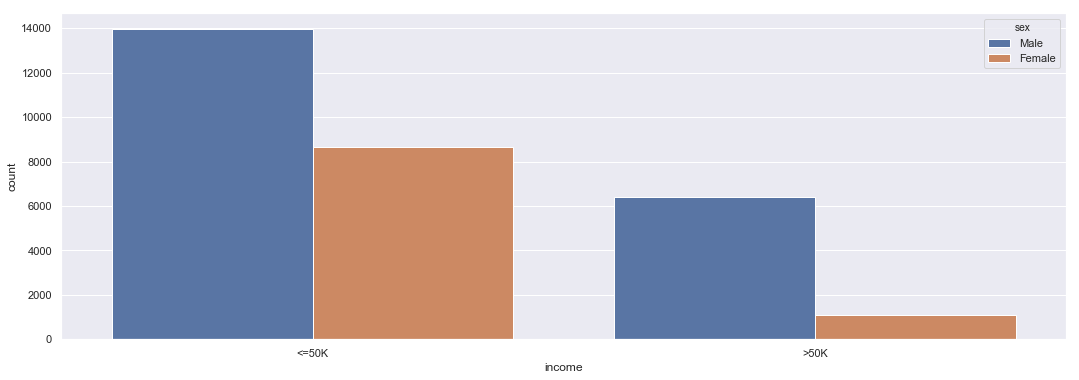

In [136]:
sns.countplot(hue='sex', x='income', data=df)

### Exercise: Create a bar plot showing count of `race`s

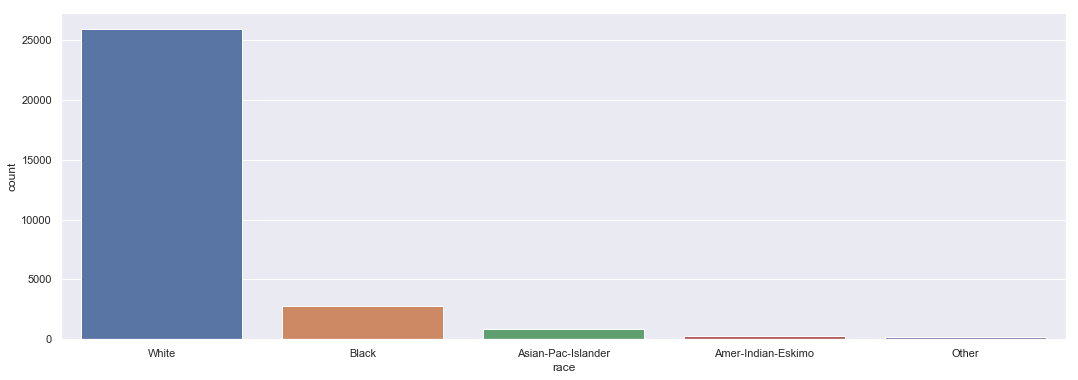

In [138]:
sns.countplot(x='race', data=df)

### Exercise: Count per `race`
*Using grouping and aggregation functions*, count how many people are per each race

In [162]:
df.groupby('race')['race'].count()

race
Amer-Indian-Eskimo      286
Asian-Pac-Islander      895
Black                  2817
Other                   231
White                 25933
Name: race, dtype: int64

### Exercise: Create a barplot with the `occupation` column

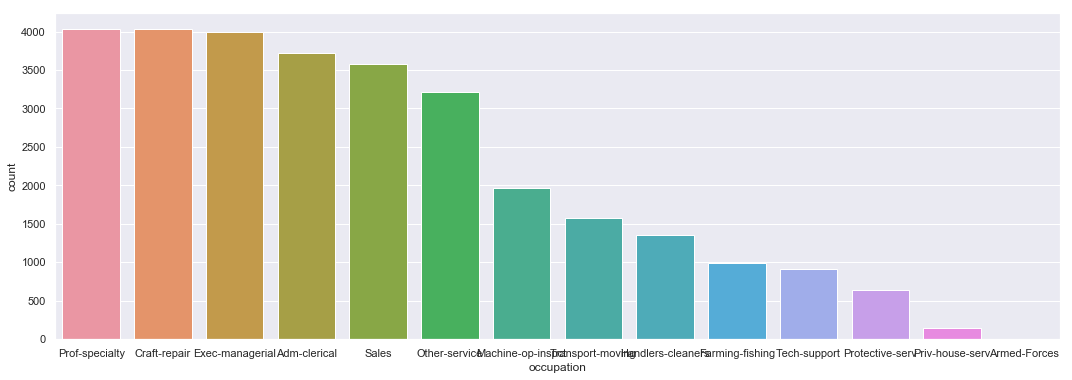

In [169]:
sns.countplot(df['occupation'], order=df['occupation'].value_counts().index)

### Exercise: Count per `occupation`
Using grouping and aggregation functions, count how many people are per each occupation

In [174]:
df.groupby('occupation')['occupation'].count()

occupation
Adm-clerical         3721
Armed-Forces            9
Craft-repair         4030
Exec-managerial      3992
Farming-fishing       989
Handlers-cleaners    1350
Machine-op-inspct    1966
Other-service        3212
Priv-house-serv       143
Prof-specialty       4038
Protective-serv       644
Sales                3584
Tech-support          912
Transport-moving     1572
Name: occupation, dtype: int64

##### While that works and is simple, there's a way to make it prettier! Watch below!

In [191]:
df.groupby('occupation').size()

occupation
Adm-clerical         3721
Armed-Forces            9
Craft-repair         4030
Exec-managerial      3992
Farming-fishing       989
Handlers-cleaners    1350
Machine-op-inspct    1966
Other-service        3212
Priv-house-serv       143
Prof-specialty       4038
Protective-serv       644
Sales                3584
Tech-support          912
Transport-moving     1572
dtype: int64

In [192]:
df.groupby('occupation').size().reset_index(name='count')

,occupation,count
0,Adm-clerical,3721
1,Armed-Forces,9
2,Craft-repair,4030
3,Exec-managerial,3992
4,Farming-fishing,989
5,Handlers-cleaners,1350
6,Machine-op-inspct,1966
7,Other-service,3212
8,Priv-house-serv,143
9,Prof-specialty,4038


In [193]:
df.groupby('occupation').size().reset_index(name='count').set_index('occupation')

,count
occupation,
Adm-clerical,3721
Armed-Forces,9
Craft-repair,4030
Exec-managerial,3992
Farming-fishing,989
Handlers-cleaners,1350
Machine-op-inspct,1966
Other-service,3212
Priv-house-serv,143


### Exercise: Display capital gains per occupation
Capital gain is defined as *"income from investment sources, apart from wages/salary"*. It's basically people generating profits form investments outside of their regular job. Show the **average** capital gain per occupation. 

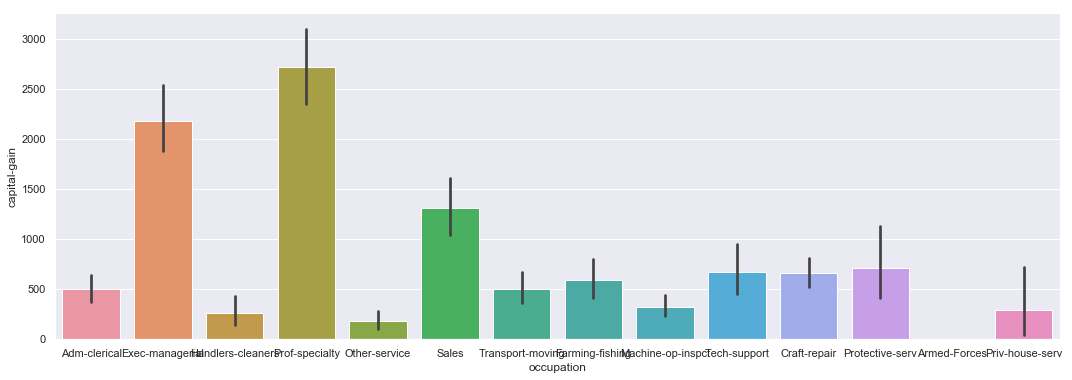

In [203]:
sns.barplot(x='occupation', y='capital-gain', data=df)

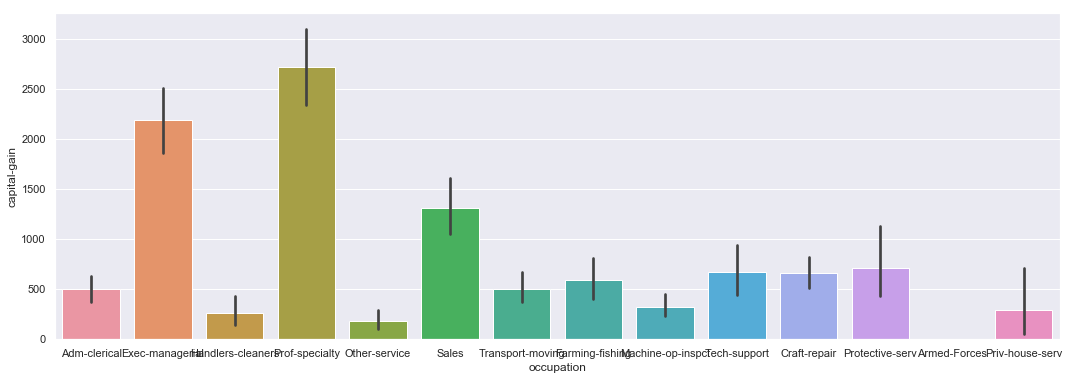

In [204]:
sns.barplot(x='occupation', y='capital-gain', data=df, estimator=np.mean)

### Exercise: Use grouping to obtain the same results as the previous plot

In [224]:
df.groupby('occupation')['capital-gain'].mean()

occupation
Adm-clerical          497.097286
Armed-Forces            0.000000
Craft-repair          657.586849
Exec-managerial      2185.330912
Farming-fishing       592.707786
Handlers-cleaners     258.140000
Machine-op-inspct     323.825025
Other-service         181.705479
Priv-house-serv       291.594406
Prof-specialty       2717.880139
Protective-serv       713.596273
Sales                1308.637835
Tech-support          668.105263
Transport-moving      498.121501
Name: capital-gain, dtype: float64

In [225]:
## their solution:
df['capital-gain'].groupby(df['occupation']).aggregate(np.mean)

occupation
Adm-clerical          497.097286
Armed-Forces            0.000000
Craft-repair          657.586849
Exec-managerial      2185.330912
Farming-fishing       592.707786
Handlers-cleaners     258.140000
Machine-op-inspct     323.825025
Other-service         181.705479
Priv-house-serv       291.594406
Prof-specialty       2717.880139
Protective-serv       713.596273
Sales                1308.637835
Tech-support          668.105263
Transport-moving      498.121501
Name: capital-gain, dtype: float64

### Exercise: Bar plot: average capital gain per race and group
Create a bar plot that shows `race` as the x-axis, and `sex` as hue, and displays the average capital gain for each group

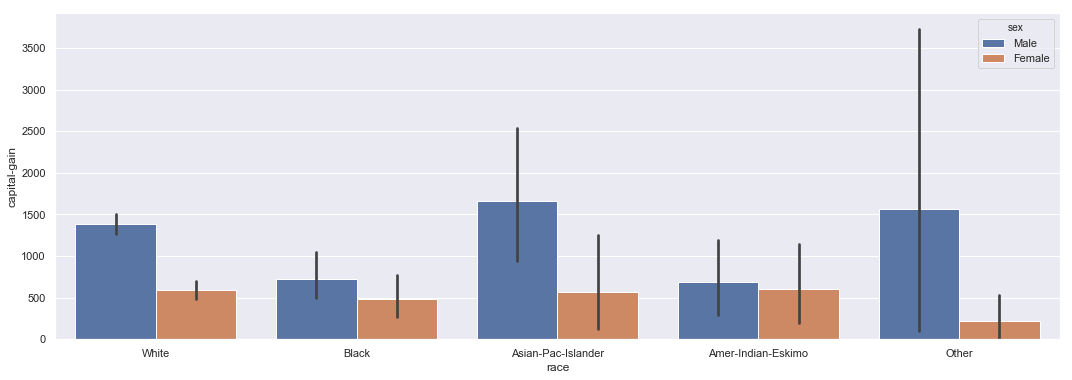

In [227]:
sns.barplot(x='race', hue='sex', y='capital-gain', data=df, estimator=np.mean)

### Exercise: Use grouping to obtain the same results as the previous plot
Use group functions to generate the values plotted above. You're basically grouping by `race` and `sex` and computing the average capital gain per group

In [239]:
df.groupby(['race', 'sex'])['capital-gain'].mean()

race                sex   
Amer-Indian-Eskimo  Female     605.682243
                    Male       692.932961
Asian-Pac-Islander  Female     564.204082
                    Male      1666.455907
Black               Female     484.871337
                    Male       722.966855
Other               Female     223.873563
                    Male      1566.208333
White               Female     588.850285
                    Male      1385.042466
Name: capital-gain, dtype: float64

In [240]:
## Their solution:
df['capital-gain'].groupby([df['race'], df['sex']]).mean()

race                sex   
Amer-Indian-Eskimo  Female     605.682243
                    Male       692.932961
Asian-Pac-Islander  Female     564.204082
                    Male      1666.455907
Black               Female     484.871337
                    Male       722.966855
Other               Female     223.873563
                    Male      1566.208333
White               Female     588.850285
                    Male      1385.042466
Name: capital-gain, dtype: float64

In [242]:
## Their alternative solution:
df['capital-gain'].groupby([df['race'], df['sex']]).aggregate(np.mean)

race                sex   
Amer-Indian-Eskimo  Female     605.682243
                    Male       692.932961
Asian-Pac-Islander  Female     564.204082
                    Male      1666.455907
Black               Female     484.871337
                    Male       722.966855
Other               Female     223.873563
                    Male      1566.208333
White               Female     588.850285
                    Male      1385.042466
Name: capital-gain, dtype: float64

In [243]:
## Another alternative solution:
df.groupby(['race', 'sex'])['capital-gain'].aggregate(np.mean)

race                sex   
Amer-Indian-Eskimo  Female     605.682243
                    Male       692.932961
Asian-Pac-Islander  Female     564.204082
                    Male      1666.455907
Black               Female     484.871337
                    Male       722.966855
Other               Female     223.873563
                    Male      1566.208333
White               Female     588.850285
                    Male      1385.042466
Name: capital-gain, dtype: float64

## The End 